# Projet

## Prérequis

In [14]:

import sys
import os
import importlib
from ydata_profiling import ProfileReport
import pandas as pd

PROJECT_PATH = os.getcwd()
SRC_PATH = os.path.join(PROJECT_PATH, "src")

if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

print("Chemin du projet :", PROJECT_PATH)
print("Chemin du dossier src :", SRC_PATH)

import explore_data
import preprocess

importlib.reload(explore_data)
importlib.reload(preprocess)

from explore_data import * 
from preprocess import * 

Chemin du projet : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet
Chemin du dossier src : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\src


## Prétraitement des données

In [2]:
process_and_save_all(PROJECT_PATH, windows=["FM12"], segments=["red"])

Traitement : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\data\raw\FM12\red\train_12.csv


c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\src\preprocess.py:83: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_path)


Sauvegardé : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\data\processed\FM12\red\train_12.csv
Traitement : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\data\raw\FM12\red\OOS_12.csv


c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\src\preprocess.py:83: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_path)


Sauvegardé : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\data\processed\FM12\red\OOS_12.csv
Traitement : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\data\raw\FM12\red\OOT_12.csv


c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\src\preprocess.py:83: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_path)


Sauvegardé : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\data\processed\FM12\red\OOT_12.csv
Traitement : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\data\raw\FM12\red\OOU.sas7bdat
Sauvegardé : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\data\processed\FM12\red\OOU_12.csv


## Importation des données prétraitées

In [18]:
data_train = load_processed_data(PROJECT_PATH, windows=["FM12"], segments=['red'], splits=["train"])
X_train, y_train = data_train.drop(columns=['DFlag']),data_train['DFlag']
data_test = load_processed_data(PROJECT_PATH, windows=["FM12"], segments=['red'], splits=["OOS"])
X_test, y_test = data_test.drop(columns=['DFlag']), data_test['DFlag']
oot_test = load_processed_data(PROJECT_PATH, windows=["FM12"], segments=['red'], splits=["OOT"])
X_oot_test, y_oot_test = oot_test.drop(columns=['DFlag']), oot_test['DFlag']
oou_test = load_processed_data(PROJECT_PATH, windows=["FM12"], segments=['red'], splits=["OOU"])
X_oou_test, y_oou_test = oou_test.drop(columns=['DFlag']), oou_test['DFlag']

## Exploration des données

In [6]:
from explore_data import *

save_path = os.path.join(PROJECT_PATH, "outputs", "exploration", "rapport_FM12.html")

data_to_explore = load_processed_data(PROJECT_PATH, windows=["FM12"], segments=['red'])
summarize_data_to_html(data_to_explore, "FM12 - Rapport", save_path)

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

Report saved : c:\Users\marct\Documents\GIF-7005\Yasmine\Projet\outputs\exploration\rapport_FM12.html


### T-SNE

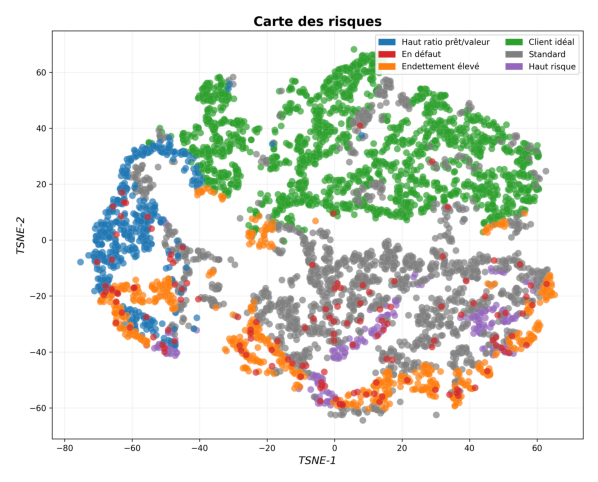

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

tsne_path = os.path.join(PROJECT_PATH, "outputs", "exploration", "tsne.png")
tsne_img = mpimg.imread(tsne_path)

plt.figure(figsize=(8,6))
plt.imshow(tsne_img)
plt.axis("off")
plt.show()


### Dérive des données

### Dérive de concept

## Entraînement et évaluation des modèles

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score

def train_and_eval(model, model_name):
    model.fit(X_train, y_train)
    results = []
    for name, (X_eval, y_eval) in {
        'OOS': (X_test, y_test),
        'OOT': (X_oot_test, y_oot_test),
        'OOU': (X_oou_test, y_oou_test)
    }.items():
        y_proba = model.predict_proba(X_eval)[:, 1]
        gini = 2 * roc_auc_score(y_eval, y_proba) - 1
        pr_auc = average_precision_score(y_eval, y_proba)
        results.append({
            'Model': model_name,
            'Dataset': name,
            'Gini': gini,
            'PR-AUC': pr_auc
        })
    return results

all_results = []

### Régression logistique

In [ ]:
log_reg = LogisticRegression(
    C=0.5, penalty="l2", class_weight="balanced",
    max_iter=3000, random_state=42
)

all_results.extend(train_and_eval(log_reg, "LogisticRegression"))

print(all_results)

[{'Model': 'LogisticRegression', 'Dataset': 'OOS', 'Gini': 0.41758293406538094, 'PR-AUC': 0.028218041429892277}, {'Model': 'LogisticRegression', 'Dataset': 'OOT', 'Gini': 0.40835310745817854, 'PR-AUC': 0.031180011479458848}, {'Model': 'LogisticRegression', 'Dataset': 'OOU', 'Gini': 0.25357949008529257, 'PR-AUC': 0.07646725439398139}, {'Model': 'LogisticRegression', 'Dataset': 'OOS', 'Gini': 0.41758293406538094, 'PR-AUC': 0.028218041429892277}, {'Model': 'LogisticRegression', 'Dataset': 'OOT', 'Gini': 0.40835310745817854, 'PR-AUC': 0.031180011479458848}, {'Model': 'LogisticRegression', 'Dataset': 'OOU', 'Gini': 0.25357949008529257, 'PR-AUC': 0.07646725439398139}]


### Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf_model = BalancedRandomForestClassifier(
    n_estimators=100,
    sampling_strategy="all",
    replacement=True,
    max_depth=12,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)

all_results.extend(train_and_eval(rf_model, "BalancedRandomForest"))


### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)

all_results.extend(train_and_eval(xgb_model, "XGBoost"))

## Résultats

In [39]:
results_df = pd.DataFrame(all_results)

results_df = results_df.drop_duplicates()

pivot_df = results_df.pivot(index="Model", columns="Dataset", values=["Gini", "PR-AUC"])

pivot_df.columns = [f"{metric}_{ds}" for metric, ds in pivot_df.columns]
pivot_df = pivot_df.reset_index()

robustness = pd.DataFrame()
robustness["Model"] = pivot_df["Model"]

gini_cols = ["Gini_OOS", "Gini_OOT", "Gini_OOU"]
robustness["Gini_Range"] = pivot_df[gini_cols].max(axis=1) - pivot_df[gini_cols].min(axis=1)
robustness["Gini_Std"] = pivot_df[gini_cols].std(axis=1)
robustness["Gini_MinMax"] = pivot_df[gini_cols].min(axis=1) / pivot_df[gini_cols].max(axis=1)
robustness["Gini_DropPct"] = (pivot_df["Gini_OOS"] - pivot_df["Gini_OOU"]) / pivot_df["Gini_OOS"]

pr_cols = ["PR-AUC_OOS", "PR-AUC_OOT", "PR-AUC_OOU"]
robustness["PRAUC_Range"] = pivot_df[pr_cols].max(axis=1) - pivot_df[pr_cols].min(axis=1)
robustness["PRAUC_Std"] = pivot_df[pr_cols].std(axis=1)
robustness["PRAUC_MinMax"] = pivot_df[pr_cols].min(axis=1) / pivot_df[pr_cols].max(axis=1)
robustness["PRAUC_DropPct"] = (pivot_df["PR-AUC_OOS"] - pivot_df["PR-AUC_OOU"]) / pivot_df["PR-AUC_OOS"]

print("\n=== Pivot_df (performances par dataset) ===\n")
print(pivot_df)

print("\n=== Robustness metrics ===\n")
print(robustness)



=== Pivot_df (performances par dataset) ===

                  Model  Gini_OOS  Gini_OOT  Gini_OOU  PR-AUC_OOS  PR-AUC_OOT  \
0  BalancedRandomForest  0.389827  0.373640  0.227715    0.025756    0.027715   
1    LogisticRegression  0.417583  0.408353  0.253579    0.028218    0.031180   
2               XGBoost  0.387224  0.300272  0.218662    0.026674    0.024439   

   PR-AUC_OOU  
0    0.071785  
1    0.076467  
2    0.071786  

=== Robustness metrics ===

                  Model  Gini_Range  Gini_Std  Gini_MinMax  Gini_DropPct  \
0  BalancedRandomForest    0.162112  0.089290     0.584145      0.415855   
1    LogisticRegression    0.164003  0.092139     0.607255      0.392745   
2               XGBoost    0.168562  0.084295     0.564692      0.435308   

   PRAUC_Range  PRAUC_Std  PRAUC_MinMax  PRAUC_DropPct  
0     0.046029   0.026028      0.358799      -1.787075  
1     0.048249   0.027042      0.369021      -1.709871  
2     0.047348   0.026714      0.340436      -1.691221  
